<a href="https://colab.research.google.com/github/natdebandi/xenofobia_ar/blob/main/analisis_xenofobia_pandemia_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Natalia Debandi


Este trabajo parte de los hallazgos obtenidos en la investigación realizada por Juan Manuel Pérez, Viviana Cotik y un equipo de ocho investigadores de distintas disciplinas que conformaban el proyecto PIUBAMAS Big Data y del cual se formó parte Pérez et al., 2023 . Se tomó como base el dataset construido en el marco de dicho proyecto, el cual consiste en un conjunto de más de 300 mil tweets, publicados por las cuentas de los principales diarios, relacionados con noticias y notas periodísticas y las respuestas a estos tweets, cerca de 5 millones de Tweets. Su recolección se realizó a partir de una API de Twitter de Stream entre el 1º de marzo de 2020 y el 31 de mayo de 2021. Data set disponible en: https://huggingface.co/piuba-bigdata



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [15]:
# Configurar estilo de gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/2.Data-work/python-space/periplos/df_tweets_arg.csv'



Mounted at /content/drive


Tw_arg tiene ya solo los medios de Argentina

'LANACION',
'clarincom',
'cronica',
'infobae',
'izquierdadiario',
'laderechadiario',
'laderechamedios',
'pagina12',
'perfilcom'

In [4]:
tw_arg = pd.read_csv(file_path)

In [5]:
tw_arg.head()

,tweet_id_noticia,user_noticia,date_noticia,title_noticia,url_noticia,tweet,date_tweet,APPEARANCE,CLASS,CRIMINAL,DISABLED,LGBTI,POLITICS,RACISM,WOMEN,CALLS
0,1376940813968609288,clarincom,2021-03-30 16:54:00.700,Segunda ola de coronavirus: preocupan las reun...,https://www.clarin.com/politica/segunda-ola-co...,@clarincom A mi me preocupa el trabajo.. La ev...,2021-03-30 17:03:00.900,0,0,0,0,0,0,0,0,0
1,1376940813968609288,clarincom,2021-03-30 16:54:00.700,Segunda ola de coronavirus: preocupan las reun...,https://www.clarin.com/politica/segunda-ola-co...,@clarincom Lo que preocupa. https://t.co/Vmf9V...,2021-03-30 17:05:04.500,0,0,0,0,0,0,0,0,0
2,1376940813968609288,clarincom,2021-03-30 16:54:00.700,Segunda ola de coronavirus: preocupan las reun...,https://www.clarin.com/politica/segunda-ola-co...,@clarincom Lo que les preocupa. https://t.co/P...,2021-03-30 17:06:03.100,0,0,0,0,0,0,0,0,0
3,1376940813968609288,clarincom,2021-03-30 16:54:00.700,Segunda ola de coronavirus: preocupan las reun...,https://www.clarin.com/politica/segunda-ola-co...,@clarincom Le recomendaríamos al presidente de...,2021-03-30 17:11:02.300,0,0,0,0,0,0,0,0,0
4,1376940813968609288,clarincom,2021-03-30 16:54:00.700,Segunda ola de coronavirus: preocupan las reun...,https://www.clarin.com/politica/segunda-ola-co...,@clarincom Para salvar al correo de la quiebra...,2021-03-30 17:26:00.600,0,0,0,0,0,0,0,0,0


In [12]:
tw_arg['date_tweet'] = pd.to_datetime(tw_arg['date_tweet'])
tw_arg['date_only'] = tw_arg['date_tweet'].dt.date
daily_counts = tw_arg.groupby('date_only').size().reset_index(name='tweet_count')
daily_counts


,date_only,tweet_count
0,2020-02-10,4513
1,2020-02-11,2407
2,2020-02-12,1815
3,2020-02-13,4446
4,2020-02-14,5992
...,...,...
496,2021-06-21,5709
497,2021-06-22,3501
498,2021-06-23,52
499,2021-06-24,51


In [13]:
tweets_por_dia = tw_arg.groupby('date_only').size().reset_index(name='cantidad_tweets')

print(f"\nEstadísticas de tweets por día:")
print(tweets_por_dia['cantidad_tweets'].describe())


Estadísticas de tweets por día:
count      501.000000
mean     10964.864271
std       4972.450800
min          2.000000
25%       8071.000000
50%      11271.000000
75%      14417.000000
max      25752.000000
Name: cantidad_tweets, dtype: float64


Cantidad de TW recolectados por día en el dataset completo

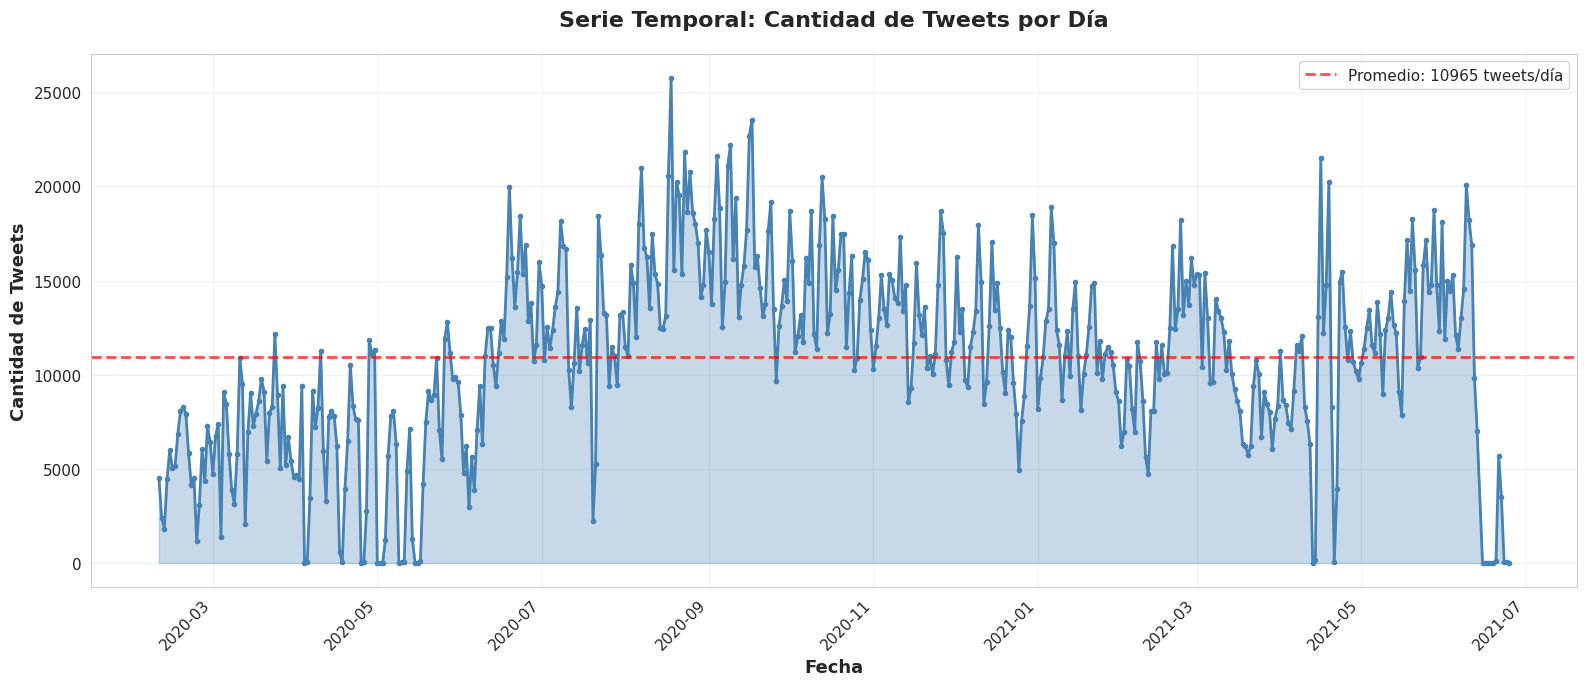


Día con más tweets: 2020-08-18
Cantidad máxima: 25752 tweets

Día con menos tweets: 2021-06-15
Cantidad mínima: 2 tweets


In [16]:

# Paso 4: Crear el gráfico de serie temporal
fig, ax = plt.subplots(figsize=(16, 7))

# Gráfico de línea con área sombreada
ax.fill_between(tweets_por_dia['date_only'],
                tweets_por_dia['cantidad_tweets'],
                alpha=0.3,
                color='steelblue')
ax.plot(tweets_por_dia['date_only'],
        tweets_por_dia['cantidad_tweets'],
        linewidth=2,
        color='steelblue',
        marker='o',
        markersize=3)

# Títulos y etiquetas
ax.set_title('Serie Temporal: Cantidad de Tweets por Día',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Fecha', fontsize=13, fontweight='bold')
ax.set_ylabel('Cantidad de Tweets', fontsize=13, fontweight='bold')

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Agregar línea de promedio
promedio = tweets_por_dia['cantidad_tweets'].mean()
ax.axhline(y=promedio,
           color='red',
           linestyle='--',
           linewidth=2,
           alpha=0.7,
           label=f'Promedio: {promedio:.0f} tweets/día')

# Agregar leyenda
ax.legend(fontsize=11, loc='upper right')

# Grid
ax.grid(True, alpha=0.3)

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

# Mostrar estadísticas adicionales
print(f"\nDía con más tweets: {tweets_por_dia.loc[tweets_por_dia['cantidad_tweets'].idxmax(), 'date_only'].strftime('%Y-%m-%d')}")
print(f"Cantidad máxima: {tweets_por_dia['cantidad_tweets'].max()} tweets")
print(f"\nDía con menos tweets: {tweets_por_dia.loc[tweets_por_dia['cantidad_tweets'].idxmin(), 'date_only'].strftime('%Y-%m-%d')}")
print(f"Cantidad mínima: {tweets_por_dia['cantidad_tweets'].min()} tweets")

In [17]:
hateful_columns = ['APPEARANCE', 'CLASS', 'CRIMINAL', 'DISABLED', 'LGBTI', 'POLITICS', 'RACISM', 'WOMEN']


In [18]:
tw_arg['HATEFUL'] = tw_arg[hateful_columns].any(axis=1)


In [21]:
df=tw_arg

Analisis de cantidad de TW odiosos

In [25]:
# Contar tweets hateful por día
hateful_por_dia = df_hateful.groupby('date_only').size().reset_index(name='cantidad_hateful')


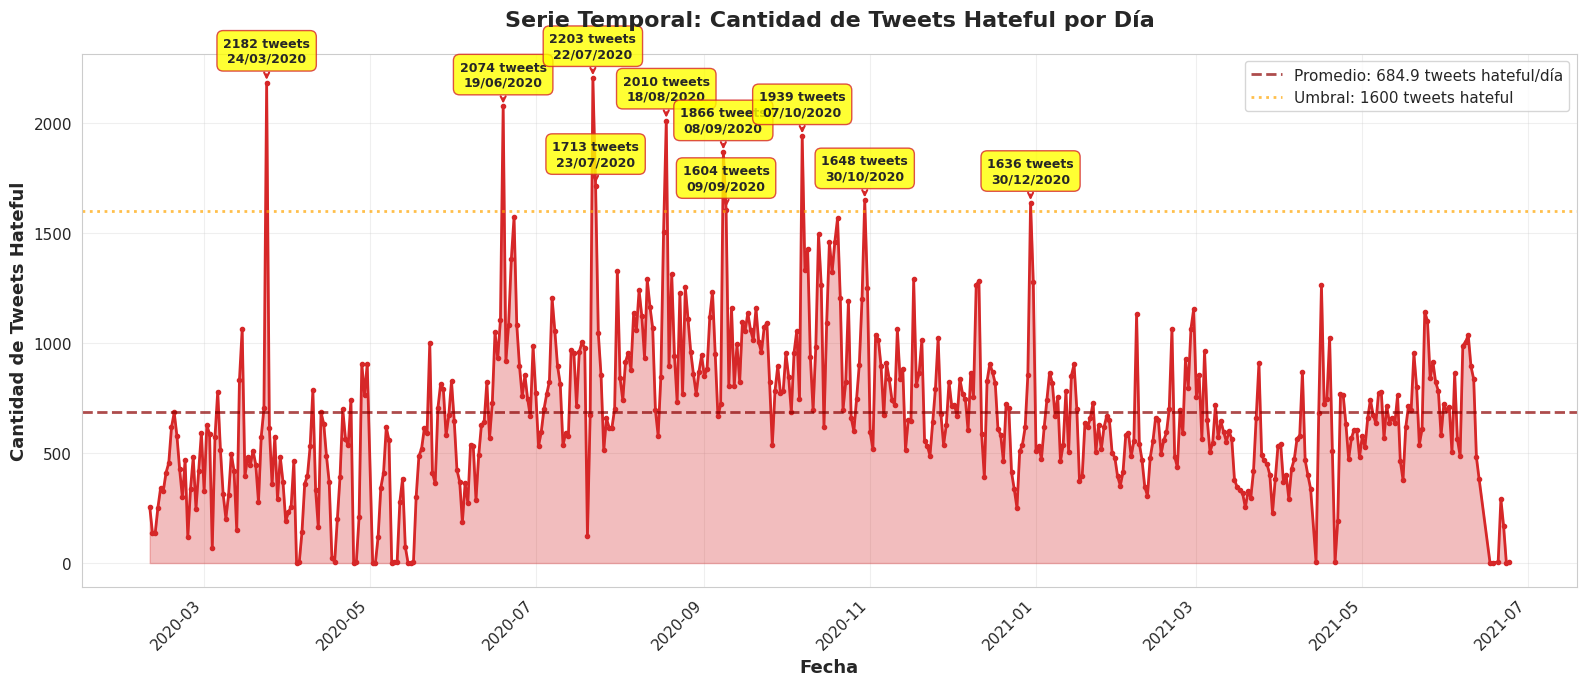


Días con más de 1600 tweets hateful:
Fecha: 2020-03-24 - Cantidad: 2182 tweets
Fecha: 2020-06-19 - Cantidad: 2074 tweets
Fecha: 2020-07-22 - Cantidad: 2203 tweets
Fecha: 2020-07-23 - Cantidad: 1713 tweets
Fecha: 2020-08-18 - Cantidad: 2010 tweets
Fecha: 2020-09-08 - Cantidad: 1866 tweets
Fecha: 2020-09-09 - Cantidad: 1604 tweets
Fecha: 2020-10-07 - Cantidad: 1939 tweets
Fecha: 2020-10-30 - Cantidad: 1648 tweets
Fecha: 2020-12-30 - Cantidad: 1636 tweets

Total de días que superan el umbral: 10


In [26]:

fig, ax = plt.subplots(figsize=(16, 7))

# Gráfico de línea con área sombreada
ax.fill_between(hateful_por_dia['date_only'],
                hateful_por_dia['cantidad_hateful'],
                alpha=0.3,
                color='#d62728')
ax.plot(hateful_por_dia['date_only'],
        hateful_por_dia['cantidad_hateful'],
        linewidth=2,
        color='#d62728',
        marker='o',
        markersize=3)

# Agregar etiquetas para días con más de 1600 tweets hateful
umbral = 1600
dias_alto = hateful_por_dia[hateful_por_dia['cantidad_hateful'] > umbral]

for idx, row in dias_alto.iterrows():
    ax.annotate(f"{int(row['cantidad_hateful'])} tweets\n{row['date_only'].strftime('%d/%m/%Y')}",
                xy=(row['date_only'], row['cantidad_hateful']),
                xytext=(0, 15),  # Desplazamiento vertical de 15 puntos
                textcoords='offset points',
                ha='center',
                fontsize=9,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='yellow',
                         edgecolor='#d62728',
                         alpha=0.8),
                arrowprops=dict(arrowstyle='->',
                               connectionstyle='arc3,rad=0',
                               color='#d62728',
                               lw=1.5))

# Títulos y etiquetas
ax.set_title('Serie Temporal: Cantidad de Tweets Hateful por Día',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Fecha', fontsize=13, fontweight='bold')
ax.set_ylabel('Cantidad de Tweets Hateful', fontsize=13, fontweight='bold')

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Agregar línea de promedio
promedio_hateful = hateful_por_dia['cantidad_hateful'].mean()
ax.axhline(y=promedio_hateful,
           color='darkred',
           linestyle='--',
           linewidth=2,
           alpha=0.7,
           label=f'Promedio: {promedio_hateful:.1f} tweets hateful/día')

# Agregar línea de umbral
ax.axhline(y=umbral,
           color='orange',
           linestyle=':',
           linewidth=2,
           alpha=0.7,
           label=f'Umbral: {umbral} tweets hateful')

# Agregar leyenda
ax.legend(fontsize=11, loc='upper right')

# Grid
ax.grid(True, alpha=0.3)

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

# Mostrar información sobre los días que superan el umbral
print(f"\nDías con más de {umbral} tweets hateful:")
print("="*60)
for idx, row in dias_alto.iterrows():
    print(f"Fecha: {row['date_only'].strftime('%Y-%m-%d')} - Cantidad: {int(row['cantidad_hateful'])} tweets")
print(f"\nTotal de días que superan el umbral: {len(dias_alto)}")

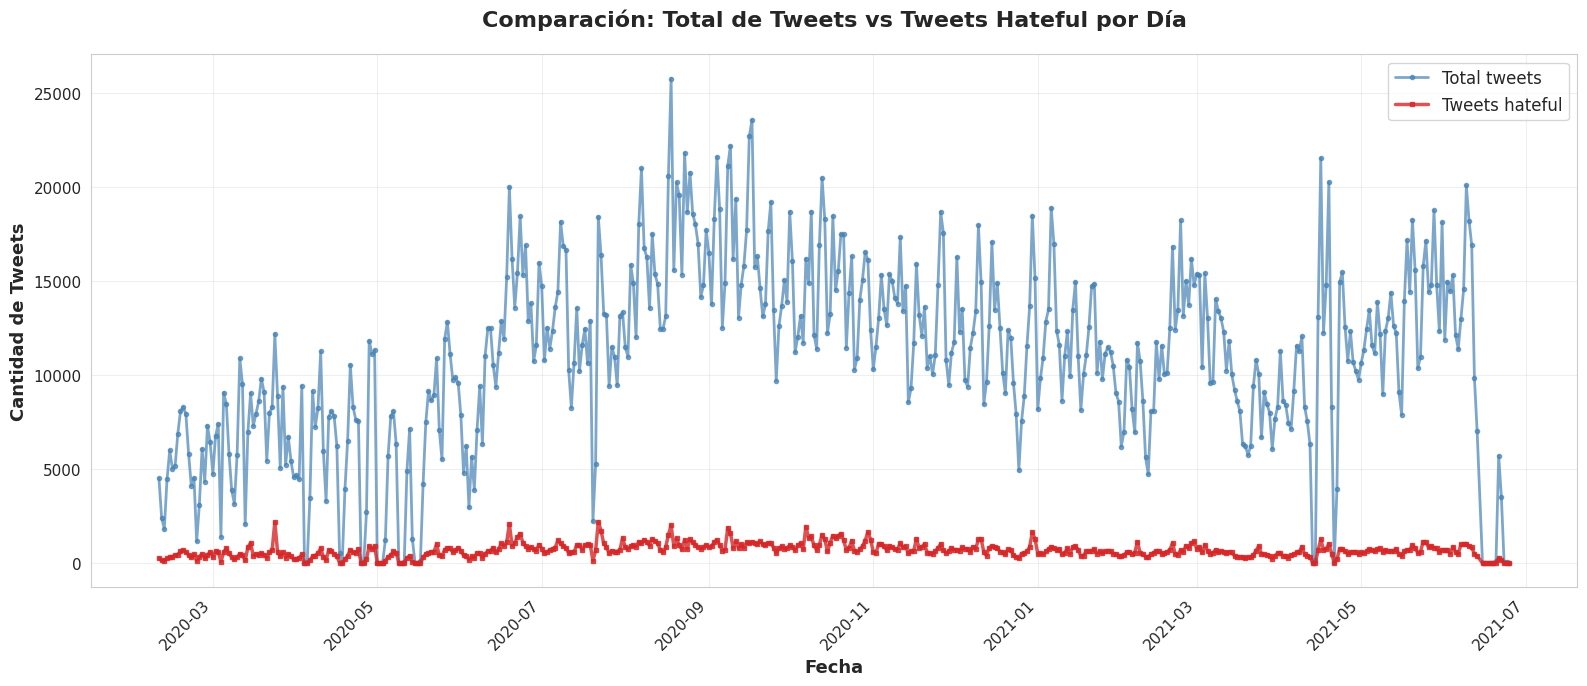


Porcentaje promedio de tweets hateful por día: 6.16%
Porcentaje máximo en un día: 17.91%
Porcentaje mínimo en un día: 0.00%


In [27]:
# Paso 8: BONUS - Gráfico comparativo (Total vs Hateful)
fig, ax = plt.subplots(figsize=(16, 7))

# Combinar ambos datasets para tener todas las fechas
tweets_comparacion = tweets_por_dia.merge(hateful_por_dia,
                                           on='date_only',
                                           how='left')
tweets_comparacion['cantidad_hateful'] = tweets_comparacion['cantidad_hateful'].fillna(0)

# Graficar ambas series
ax.plot(tweets_comparacion['date_only'],
        tweets_comparacion['cantidad_tweets'],
        linewidth=2,
        color='steelblue',
        marker='o',
        markersize=3,
        label='Total tweets',
        alpha=0.7)

ax.plot(tweets_comparacion['date_only'],
        tweets_comparacion['cantidad_hateful'],
        linewidth=2.5,
        color='#d62728',
        marker='s',
        markersize=3,
        label='Tweets hateful',
        alpha=0.8)

# Títulos y etiquetas
ax.set_title('Comparación: Total de Tweets vs Tweets Hateful por Día',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Fecha', fontsize=13, fontweight='bold')
ax.set_ylabel('Cantidad de Tweets', fontsize=13, fontweight='bold')

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Agregar leyenda
ax.legend(fontsize=12, loc='upper right')

# Grid
ax.grid(True, alpha=0.3)

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

# Calcular porcentaje de hateful por día
tweets_comparacion['porcentaje_hateful'] = (tweets_comparacion['cantidad_hateful'] /
                                             tweets_comparacion['cantidad_tweets'] * 100)

print(f"\nPorcentaje promedio de tweets hateful por día: {tweets_comparacion['porcentaje_hateful'].mean():.2f}%")
print(f"Porcentaje máximo en un día: {tweets_comparacion['porcentaje_hateful'].max():.2f}%")
print(f"Porcentaje mínimo en un día: {tweets_comparacion['porcentaje_hateful'].min():.2f}%")

In [28]:
# Paso 9: Análisis de categorías de discriminación
print("="*60)
print("ANÁLISIS DE CATEGORÍAS DE DISCRIMINACIÓN")
print("="*60)

# Definir las columnas de categorías
categorias = ['APPEARANCE', 'CLASS', 'CRIMINAL', 'DISABLED', 'LGBTI', 'POLITICS', 'RACISM', 'WOMEN']

# Contar la cantidad de tweets por categoría
conteo_categorias = df[categorias].sum().sort_values(ascending=False)

print("\nCantidad de tweets por categoría:")
print(conteo_categorias)
print("\n")

# Calcular porcentajes respecto al total de tweets
print("Porcentaje respecto al total de tweets:")
for cat in conteo_categorias.index:
    porcentaje = (conteo_categorias[cat] / len(df)) * 100
    print(f"{cat}: {conteo_categorias[cat]} tweets ({porcentaje:.2f}%)")

ANÁLISIS DE CATEGORÍAS DE DISCRIMINACIÓN

Cantidad de tweets por categoría:
APPEARANCE    106462
POLITICS       93515
DISABLED       44025
WOMEN          43742
CRIMINAL       37583
RACISM         35872
CLASS          24033
LGBTI          16883
dtype: int64


Porcentaje respecto al total de tweets:
APPEARANCE: 106462 tweets (1.94%)
POLITICS: 93515 tweets (1.70%)
DISABLED: 44025 tweets (0.80%)
WOMEN: 43742 tweets (0.80%)
CRIMINAL: 37583 tweets (0.68%)
RACISM: 35872 tweets (0.65%)
CLASS: 24033 tweets (0.44%)
LGBTI: 16883 tweets (0.31%)


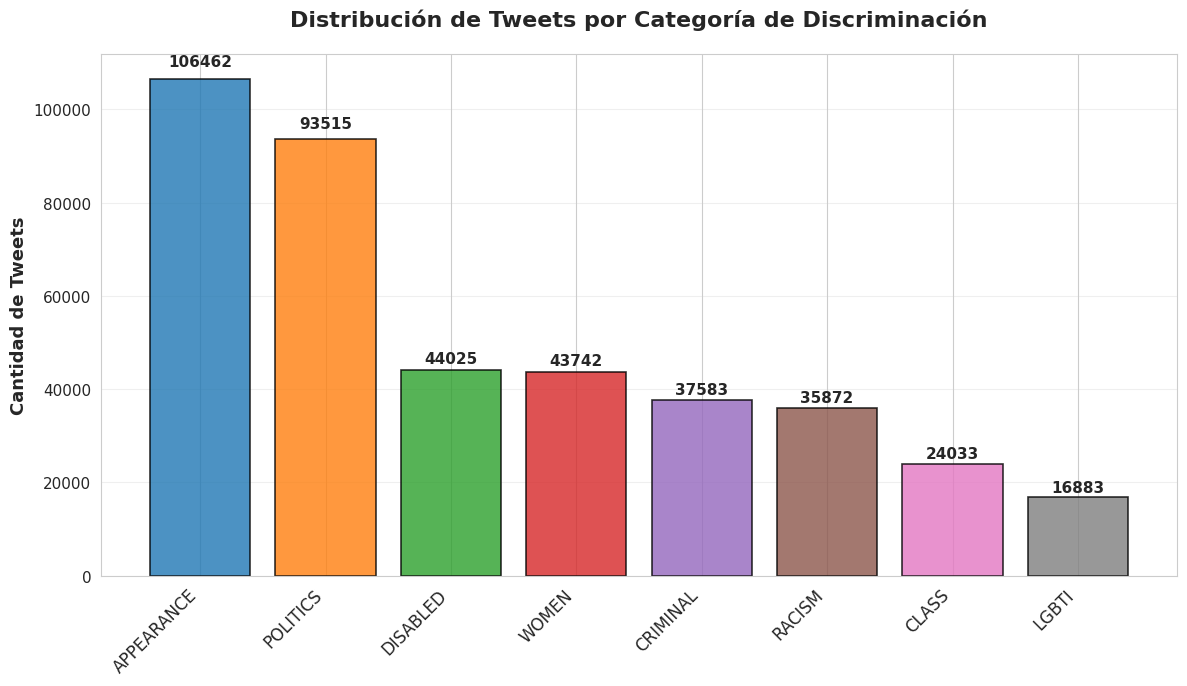

In [29]:
# Paso 10: Gráfico de barras de categorías
fig, ax = plt.subplots(figsize=(12, 7))

# Crear gráfico de barras
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
barras = ax.bar(range(len(conteo_categorias)),
                conteo_categorias.values,
                color=colores,
                alpha=0.8,
                edgecolor='black',
                linewidth=1.2)

# Agregar valores sobre las barras
for i, (cat, valor) in enumerate(conteo_categorias.items()):
    ax.text(i, valor + (valor * 0.02),
            f'{int(valor)}',
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold')

# Configurar ejes y título
ax.set_xticks(range(len(conteo_categorias)))
ax.set_xticklabels(conteo_categorias.index, rotation=45, ha='right', fontsize=12)
ax.set_ylabel('Cantidad de Tweets', fontsize=13, fontweight='bold')
ax.set_title('Distribución de Tweets por Categoría de Discriminación',
             fontsize=16,
             fontweight='bold',
             pad=20)

# Grid
ax.grid(True, alpha=0.3, axis='y')
ax.set_axisbelow(True)

# Ajustar layout
plt.tight_layout()
plt.show()

Analisis de racismo y xenofobia

In [30]:
# Paso 14: Análisis de la categoría RACISM
print("="*60)
print("ANÁLISIS DETALLADO: CATEGORÍA RACISM")
print("="*60)

# Estadísticas generales de RACISM
total_racism = df['RACISM'].sum()
total_hateful = df['HATEFUL'].sum()
total_tweets = len(df)

print(f"\nTotal de tweets con contenido racista: {total_racism}")
print(f"Total de tweets hateful: {total_hateful}")
print(f"Total de tweets en el dataset: {total_tweets}")

print(f"\nProporción de RACISM respecto al total: {(total_racism/total_tweets*100):.2f}%")
print(f"Proporción de RACISM respecto a HATEFUL: {(total_racism/total_hateful*100):.2f}%")

# Verificar si todos los tweets con RACISM son HATEFUL
racism_tweets = df[df['RACISM'] == 1]
racism_no_hateful = racism_tweets[racism_tweets['HATEFUL'] == False]
print(f"\nTweets con RACISM que NO son HATEFUL: {len(racism_no_hateful)}")

ANÁLISIS DETALLADO: CATEGORÍA RACISM

Total de tweets con contenido racista: 35872
Total de tweets hateful: 339025
Total de tweets en el dataset: 5493397

Proporción de RACISM respecto al total: 0.65%
Proporción de RACISM respecto a HATEFUL: 10.58%

Tweets con RACISM que NO son HATEFUL: 0


In [32]:
# Paso 16: Preparar datos de RACISM por día
# Filtrar tweets con RACISM
df_racism = df[df['RACISM'] == 1].copy()

print(f"\n{'='*60}")
print("SERIE TEMPORAL DE RACISM")
print("="*60)
print(f"\nRango temporal de tweets con racismo:")
print(f"Fecha inicial: {df_racism['date_only'].min()}")
print(f"Fecha final: {df_racism['date_only'].max()}")

# Contar tweets con RACISM por día
racism_por_dia = df_racism.groupby('date_only').size().reset_index(name='cantidad_racism')

print(f"\nEstadísticas de tweets con racismo por día:")
print(racism_por_dia['cantidad_racism'].describe())


SERIE TEMPORAL DE RACISM

Rango temporal de tweets con racismo:
Fecha inicial: 2020-02-10
Fecha final: 2021-06-24

Estadísticas de tweets con racismo por día:
count    480.000000
mean      74.733333
std       47.874223
min        1.000000
25%       46.000000
50%       64.000000
75%       91.000000
max      427.000000
Name: cantidad_racism, dtype: float64


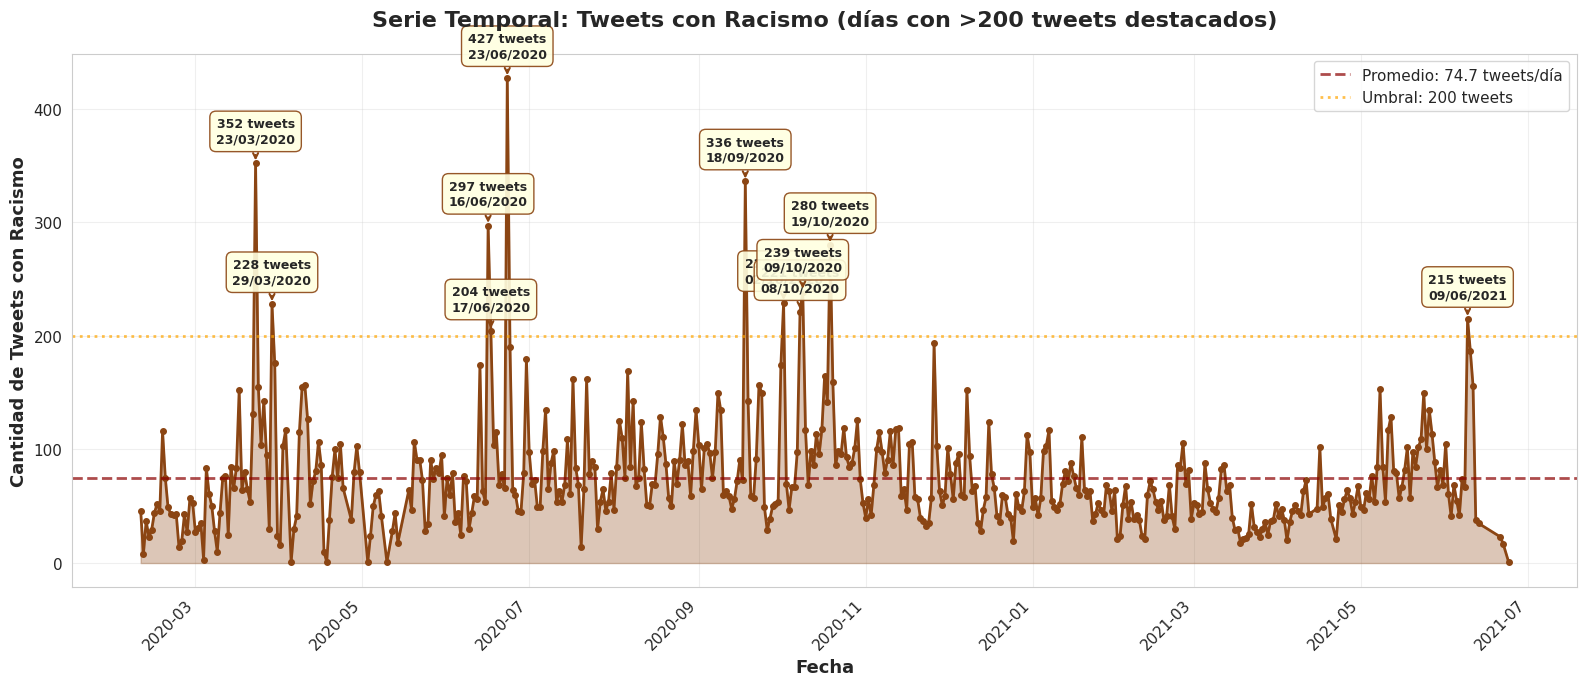


DÍAS CON MÁS DE 200 TWEETS RACISTAS
Fecha: 2020-06-23 - Cantidad: 427 tweets racistas
Fecha: 2020-03-23 - Cantidad: 352 tweets racistas
Fecha: 2020-09-18 - Cantidad: 336 tweets racistas
Fecha: 2020-06-16 - Cantidad: 297 tweets racistas
Fecha: 2020-10-19 - Cantidad: 280 tweets racistas
Fecha: 2020-10-09 - Cantidad: 239 tweets racistas
Fecha: 2020-10-02 - Cantidad: 229 tweets racistas
Fecha: 2020-03-29 - Cantidad: 228 tweets racistas
Fecha: 2020-10-08 - Cantidad: 221 tweets racistas
Fecha: 2021-06-09 - Cantidad: 215 tweets racistas
Fecha: 2020-06-17 - Cantidad: 204 tweets racistas

Total de días que superan el umbral: 11
Porcentaje de días sobre el umbral: 2.3%


In [36]:
# Paso 19 MODIFICADO: Gráfico con etiquetas en días con más de 200 tweets racistas
fig, ax = plt.subplots(figsize=(16, 7))

# Gráfico de línea con área sombreada
ax.fill_between(racism_por_dia['date_only'],
                racism_por_dia['cantidad_racism'],
                alpha=0.3,
                color='#8B4513')
ax.plot(racism_por_dia['date_only'],
        racism_por_dia['cantidad_racism'],
        linewidth=2,
        color='#8B4513',
        marker='o',
        markersize=4)

# Definir umbral
umbral_racism = 200

# Agregar etiquetas para días con más de 200 tweets racistas
dias_alto_racism = racism_por_dia[racism_por_dia['cantidad_racism'] > umbral_racism]

for idx, row in dias_alto_racism.iterrows():
    ax.annotate(f"{int(row['cantidad_racism'])} tweets\n{row['date_only'].strftime('%d/%m/%Y')}",
                xy=(row['date_only'], row['cantidad_racism']),
                xytext=(0, 15),
                textcoords='offset points',
                ha='center',
                fontsize=9,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='lightyellow',
                         edgecolor='#8B4513',
                         alpha=0.9),
                arrowprops=dict(arrowstyle='->',
                               connectionstyle='arc3,rad=0',
                               color='#8B4513',
                               lw=1.5))

# Títulos y etiquetas
ax.set_title('Serie Temporal: Tweets con Racismo (días con >200 tweets destacados)',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Fecha', fontsize=13, fontweight='bold')
ax.set_ylabel('Cantidad de Tweets con Racismo', fontsize=13, fontweight='bold')

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Agregar línea de promedio
promedio_racism = racism_por_dia['cantidad_racism'].mean()
ax.axhline(y=promedio_racism,
           color='darkred',
           linestyle='--',
           linewidth=2,
           alpha=0.7,
           label=f'Promedio: {promedio_racism:.1f} tweets/día')

# Agregar línea de umbral
ax.axhline(y=umbral_racism,
           color='orange',
           linestyle=':',
           linewidth=2,
           alpha=0.7,
           label=f'Umbral: {umbral_racism} tweets')

# Agregar leyenda
ax.legend(fontsize=11, loc='upper right')

# Grid
ax.grid(True, alpha=0.3)

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

# Mostrar información sobre los días que superan el umbral
print(f"\n{'='*60}")
print(f"DÍAS CON MÁS DE {umbral_racism} TWEETS RACISTAS")
print("="*60)
dias_ordenados = dias_alto_racism.sort_values('cantidad_racism', ascending=False)
for idx, row in dias_ordenados.iterrows():
    print(f"Fecha: {row['date_only'].strftime('%Y-%m-%d')} - Cantidad: {int(row['cantidad_racism'])} tweets racistas")

print(f"\nTotal de días que superan el umbral: {len(dias_alto_racism)}")
print(f"Porcentaje de días sobre el umbral: {(len(dias_alto_racism)/len(racism_por_dia)*100):.1f}%")

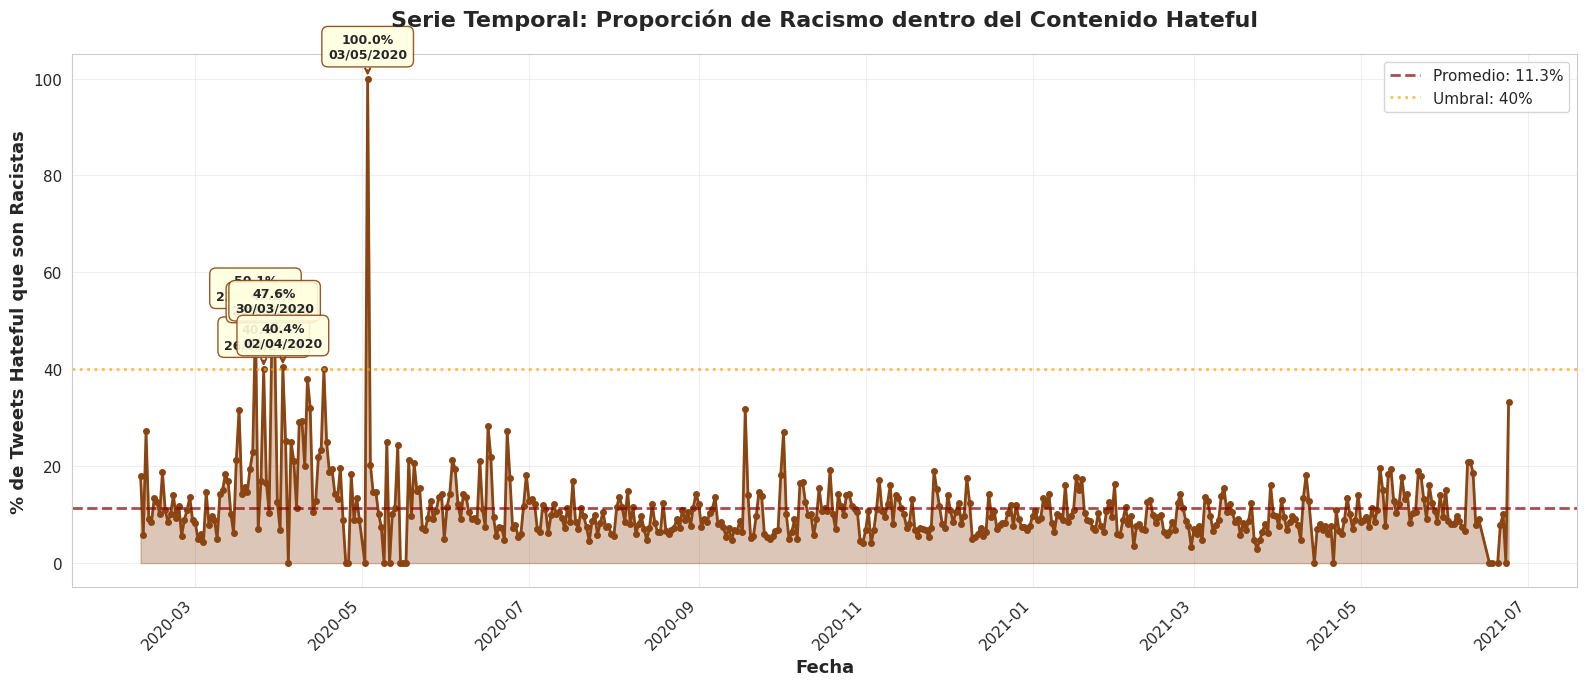

In [38]:
# Paso 20: Serie temporal de proporción de RACISM dentro de HATEFUL
fig, ax = plt.subplots(figsize=(16, 7))

# Usar los datos de comparación que ya creamos
# (si no los tienes, primero ejecuta el Paso 18)

# Calcular proporción si no está ya calculada
if 'porcentaje_racism' not in comparacion_racism.columns:
    comparacion_racism['porcentaje_racism'] = (comparacion_racism['cantidad_racism'] /
                                                comparacion_racism['cantidad_hateful'] * 100)

# Gráfico de línea con área sombreada
ax.fill_between(comparacion_racism['date_only'],
                comparacion_racism['porcentaje_racism'],
                alpha=0.3,
                color='#8B4513')
ax.plot(comparacion_racism['date_only'],
        comparacion_racism['porcentaje_racism'],
        linewidth=2,
        color='#8B4513',
        marker='o',
        markersize=4)

# Definir umbral de proporción (por ejemplo, días donde >15% es racismo)
umbral_proporcion = 40

# Agregar etiquetas para días donde la proporción supera el umbral
dias_alta_proporcion = comparacion_racism[comparacion_racism['porcentaje_racism'] > umbral_proporcion]

for idx, row in dias_alta_proporcion.iterrows():
    ax.annotate(f"{row['porcentaje_racism']:.1f}%\n{row['date_only'].strftime('%d/%m/%Y')}",
                xy=(row['date_only'], row['porcentaje_racism']),
                xytext=(0, 15),
                textcoords='offset points',
                ha='center',
                fontsize=9,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='lightyellow',
                         edgecolor='#8B4513',
                         alpha=0.9),
                arrowprops=dict(arrowstyle='->',
                               connectionstyle='arc3,rad=0',
                               color='#8B4513',
                               lw=1.5))

# Títulos y etiquetas
ax.set_title('Serie Temporal: Proporción de Racismo dentro del Contenido Hateful',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Fecha', fontsize=13, fontweight='bold')
ax.set_ylabel('% de Tweets Hateful que son Racistas', fontsize=13, fontweight='bold')

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Agregar línea de promedio
promedio_proporcion = comparacion_racism['porcentaje_racism'].mean()
ax.axhline(y=promedio_proporcion,
           color='darkred',
           linestyle='--',
           linewidth=2,
           alpha=0.7,
           label=f'Promedio: {promedio_proporcion:.1f}%')

# Agregar línea de umbral
ax.axhline(y=umbral_proporcion,
           color='orange',
           linestyle=':',
           linewidth=2,
           alpha=0.7,
           label=f'Umbral: {umbral_proporcion}%')

# Agregar leyenda
ax.legend(fontsize=11, loc='upper right')

# Grid
ax.grid(True, alpha=0.3)

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()



In [39]:
# Paso 22: Análisis de la etiqueta CALLS
print("="*60)
print("ANÁLISIS DE LA ETIQUETA CALLS")
print("="*60)

# Estadísticas generales de CALLS
total_calls = df['CALLS'].sum()
print(f"\nTotal de tweets con CALLS: {total_calls}")
print(f"Proporción de CALLS respecto al total: {(total_calls/len(df)*100):.2f}%")
print(f"Proporción de CALLS respecto a HATEFUL: {(total_calls/total_hateful*100):.2f}%")

# Ver distribución de valores en CALLS
print(f"\nDistribución de valores en CALLS:")
print(df['CALLS'].value_counts().sort_index())

ANÁLISIS DE LA ETIQUETA CALLS

Total de tweets con CALLS: 21640
Proporción de CALLS respecto al total: 0.39%
Proporción de CALLS respecto a HATEFUL: 6.38%

Distribución de valores en CALLS:
CALLS
0    5471757
1      21640
Name: count, dtype: int64


In [40]:
# Paso 23: Calcular proporción de CALLS para cada categoría
categorias = ['RACISM', 'CLASS', 'APPEARANCE', 'CRIMINAL', 'DISABLED', 'LGBTI', 'POLITICS', 'WOMEN']

# Crear diccionario para almacenar resultados
resultados_calls = {}

print(f"\n{'='*60}")
print("PROPORCIÓN DE CALLS POR CATEGORÍA")
print("="*60)

for cat in categorias:
    # Filtrar tweets que tienen esta categoría
    tweets_categoria = df[df[cat] == 1]
    total_categoria = len(tweets_categoria)

    if total_categoria > 0:
        # Contar cuántos de esos tweets también tienen CALLS
        tweets_con_calls = tweets_categoria[tweets_categoria['CALLS'] == 1]
        total_con_calls = len(tweets_con_calls)

        # Tweets sin CALLS
        total_sin_calls = total_categoria - total_con_calls

        # Calcular proporción
        proporcion_calls = (total_con_calls / total_categoria) * 100

        resultados_calls[cat] = {
            'total': total_categoria,
            'con_calls': total_con_calls,
            'sin_calls': total_sin_calls,
            'proporcion_calls': proporcion_calls
        }

        print(f"\n{cat}:")
        print(f"  Total tweets: {total_categoria}")
        print(f"  Con CALLS: {total_con_calls} ({proporcion_calls:.1f}%)")
        print(f"  Sin CALLS: {total_sin_calls} ({100-proporcion_calls:.1f}%)")


PROPORCIÓN DE CALLS POR CATEGORÍA

RACISM:
  Total tweets: 35872
  Con CALLS: 5541 (15.4%)
  Sin CALLS: 30331 (84.6%)

CLASS:
  Total tweets: 24033
  Con CALLS: 2509 (10.4%)
  Sin CALLS: 21524 (89.6%)

APPEARANCE:
  Total tweets: 106462
  Con CALLS: 650 (0.6%)
  Sin CALLS: 105812 (99.4%)

CRIMINAL:
  Total tweets: 37583
  Con CALLS: 11865 (31.6%)
  Sin CALLS: 25718 (68.4%)

DISABLED:
  Total tweets: 44025
  Con CALLS: 177 (0.4%)
  Sin CALLS: 43848 (99.6%)

LGBTI:
  Total tweets: 16883
  Con CALLS: 178 (1.1%)
  Sin CALLS: 16705 (98.9%)

POLITICS:
  Total tweets: 93515
  Con CALLS: 4175 (4.5%)
  Sin CALLS: 89340 (95.5%)

WOMEN:
  Total tweets: 43742
  Con CALLS: 445 (1.0%)
  Sin CALLS: 43297 (99.0%)


In [42]:
# Paso 24: Crear DataFrame para visualización
df_calls_viz = pd.DataFrame(resultados_calls).T
df_calls_viz = df_calls_viz.sort_values('proporcion_calls', ascending=False)

print(f"\n{'='*60}")
print("RESUMEN ORDENADO POR PROPORCIÓN DE CALLS")
print("="*60)
print(df_calls_viz[['total', 'con_calls', 'proporcion_calls']])


RESUMEN ORDENADO POR PROPORCIÓN DE CALLS
               total  con_calls  proporcion_calls
CRIMINAL     37583.0    11865.0         31.570125
RACISM       35872.0     5541.0         15.446588
CLASS        24033.0     2509.0         10.439812
POLITICS     93515.0     4175.0          4.464524
LGBTI        16883.0      178.0          1.054315
WOMEN        43742.0      445.0          1.017329
APPEARANCE  106462.0      650.0          0.610546
DISABLED     44025.0      177.0          0.402044


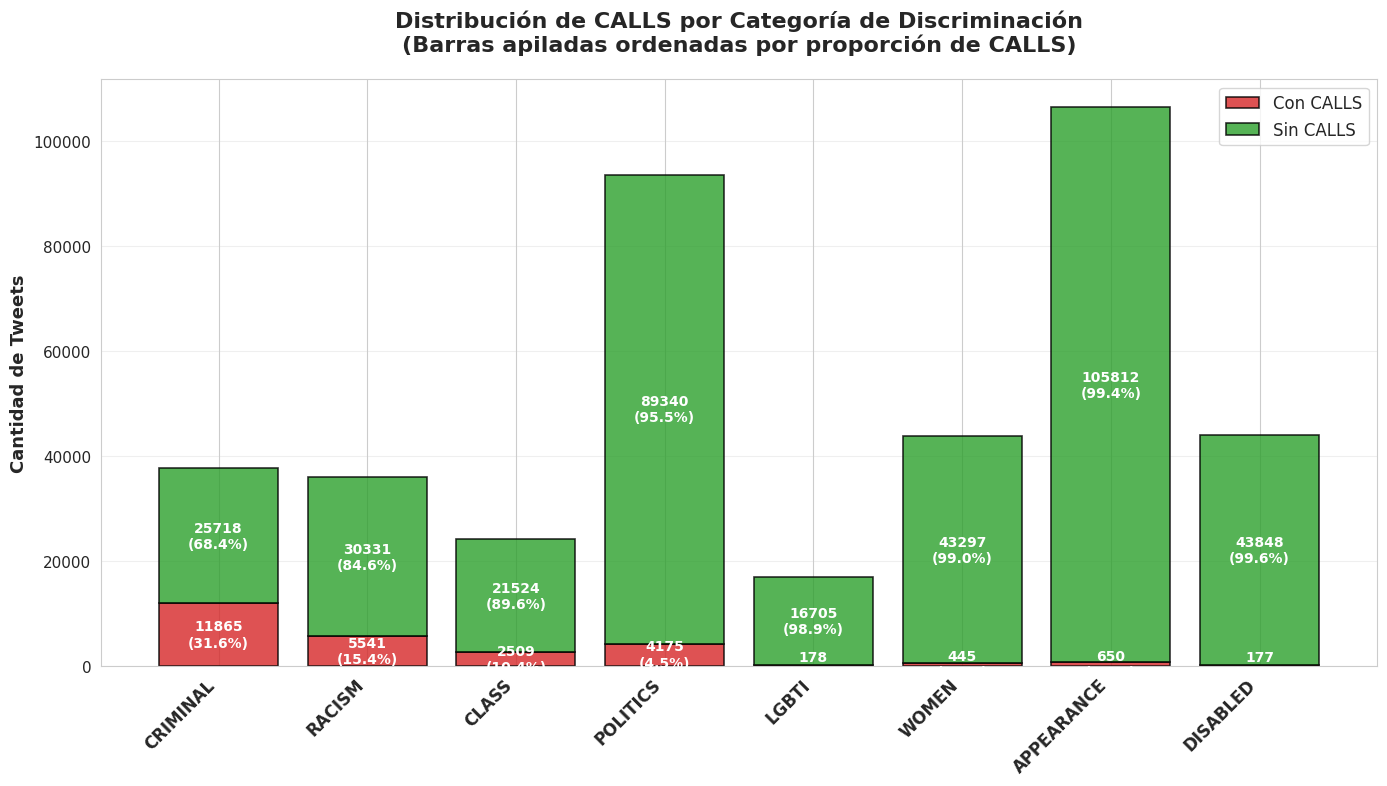

In [43]:
# Paso 25: Gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(14, 8))

# Preparar datos para el gráfico
categorias_ordenadas = df_calls_viz.index.tolist()
con_calls = df_calls_viz['con_calls'].values
sin_calls = df_calls_viz['sin_calls'].values

# Posiciones de las barras
x_pos = range(len(categorias_ordenadas))

# Crear barras apiladas
barras_con_calls = ax.bar(x_pos, con_calls,
                           label='Con CALLS',
                           color='#d62728',
                           alpha=0.8,
                           edgecolor='black',
                           linewidth=1.2)

barras_sin_calls = ax.bar(x_pos, sin_calls,
                           bottom=con_calls,
                           label='Sin CALLS',
                           color='#2ca02c',
                           alpha=0.8,
                           edgecolor='black',
                           linewidth=1.2)

# Agregar etiquetas con valores y porcentajes
for i, cat in enumerate(categorias_ordenadas):
    # Etiqueta para la parte "con CALLS"
    if con_calls[i] > 0:
        altura_con = con_calls[i] / 2
        porcentaje_con = (con_calls[i] / df_calls_viz.loc[cat, 'total']) * 100
        ax.text(i, altura_con,
                f'{int(con_calls[i])}\n({porcentaje_con:.1f}%)',
                ha='center',
                va='center',
                fontsize=10,
                fontweight='bold',
                color='white')

    # Etiqueta para la parte "sin CALLS"
    if sin_calls[i] > 0:
        altura_sin = con_calls[i] + (sin_calls[i] / 2)
        porcentaje_sin = (sin_calls[i] / df_calls_viz.loc[cat, 'total']) * 100
        ax.text(i, altura_sin,
                f'{int(sin_calls[i])}\n({porcentaje_sin:.1f}%)',
                ha='center',
                va='center',
                fontsize=10,
                fontweight='bold',
                color='white')

# Configurar ejes y título
ax.set_xticks(x_pos)
ax.set_xticklabels(categorias_ordenadas, rotation=45, ha='right', fontsize=12, fontweight='bold')
ax.set_ylabel('Cantidad de Tweets', fontsize=13, fontweight='bold')
ax.set_title('Distribución de CALLS por Categoría de Discriminación\n(Barras apiladas ordenadas por proporción de CALLS)',
             fontsize=16,
             fontweight='bold',
             pad=20)

# Leyenda
ax.legend(fontsize=12, loc='upper right')

# Grid
ax.grid(True, alpha=0.3, axis='y')
ax.set_axisbelow(True)

# Ajustar layout
plt.tight_layout()
plt.show()